# Calculus

First we import everything from sympy

In [2]:
from sympy import *
init_printing()  # import the best printer available
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

### Derivatives

We can perform derivatives in sympy

In [3]:
diff(sin(cos(x)), x)

There are two different sintaxes, both very intuitive, to perform several derivatives

In [3]:
diff(exp(x**2), x, x, x)

In [4]:
diff(exp(x**2), x, 3)

And of course we can also compute partial derivatives

In [5]:
diff(exp(x*sin(y)), x, y)

Now, let's see a trick that we will use in the examples below. First, we define our function

In [6]:
expr = exp(x*sin(y))
expr

and now a complex (complicated, that is) derivative

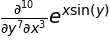

In [7]:
dexpr = Derivative(expr, x, 3, y, 7)
dexpr

The function `Derivative` creates an unevaluated (symbolic) derivative. We can calculate it at any time with the method `doit`

In [8]:
dexpr.doit()

Most of the classes that we will see below contain the method `doit`.

### Integrals

We can use the function `integrate` to compute the primitive of a function

In [9]:
integrate(cos(x)**2, x)

Note that sympy **does not** add the constant of integration. To compute a definite integral, for instance $\int^{\pi}_{0}\cos^2(x)\text{d}x$, the syntax is

In [10]:
integrate(cos(x)**2, (x, 0, pi))

We can use it to perform multiple integrals too. As an example we will compute

\\[\int^{\infty}_{-\infty} \int^{\infty}_{-\infty} e^{-x^2-y^2}\text{d}x\, \text{d}y,\\]

with the well-known result (Note that in `sympy`, the $\infty$ sign are two 'o' letters)

In [11]:
integrate(exp(-x**2-y**2), (x, -oo, oo), (y, -oo, oo))

As before, we can define an unevaluated integral expression

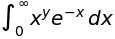

In [12]:
integ = Integral(x**y*exp(-x), (x, 0, oo))
integ

and perform it later

In [13]:
integ.doit()

⎧ Γ(y + 1)    for re(y) > -1
⎪                           
⎪∞                          
⎪⌠                          
⎨⎮  y  -x                   
⎪⎮ x ⋅ℯ   dx    otherwise   
⎪⌡                          
⎪0                          
⎩                           

In this case, the integral does not converge unless $\mathfrak{R}y>1$, so sympy returns a piecewise function. If sympy does not know how to compute an integral it returns an Integral class (i.e. the same expression). Be aware that it may take a **long** time, so maybe you will have to restart the kernel and start all over again. Later on we will learn how to compute this kind of tricky integrals numerically.

### Limits

We can compute symbolic limits

In [14]:
limit(sin(x)/x, x, 0)

Of course we can define unevaluated limit with the `Limit` class

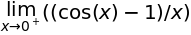

In [15]:
expr = Limit((cos(x)-1)/x, x, 0)
expr

and define right and left limits

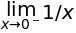

In [16]:
expr = Limit(1/x, x, 0, '-')
expr

In [17]:
expr.doit()

### Series expansion 

Any given function can be Taylor/Laurent-expanded with the method `series`,

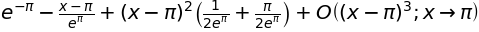

In [18]:
expr = exp(x*cos(x))
expr.series(x, pi, 3)

We can call it as a function too

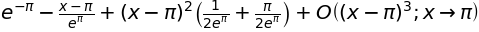

In [19]:
series(expr, x, pi, 3)

An example of a Laurent expansion

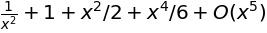

In [20]:
expr = exp(x**2)/x**2
expr.series(x, 0, 5)